In [1]:
dataset = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
!pip install Pillow

In [5]:
import PIL # Pyhton Images Library 

data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset, cache_dir = '.', untar = True)

175964160/228813984 ━━━━━━━━━━━━━━━━━━━━ 3:05 4us/step

Exception: URL fetch failure on https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz: None -- retrieval incomplete: got only 175969165 out of 228813984 bytes

In [6]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset, cache_dir='.', untar=True, force_download=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 425s 2us/step


In [7]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [11]:
## if you want to see only roes images then just:

roses = list(data_dir.glob('roses/*.jpg'))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

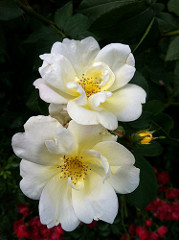

In [12]:
PIL.Image.open(str(roses[0]))

In [13]:
PIL.Image.open(str(roses[0])).size

(179, 240)

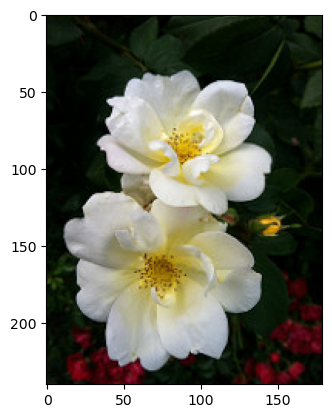

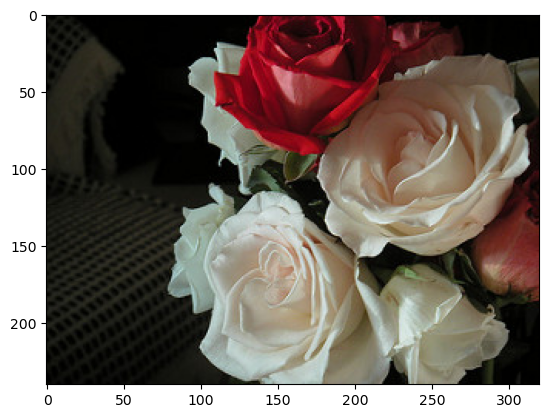

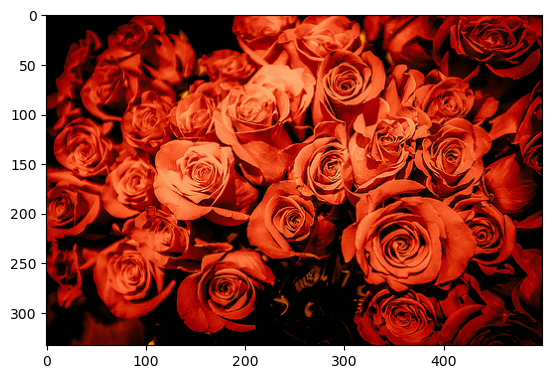

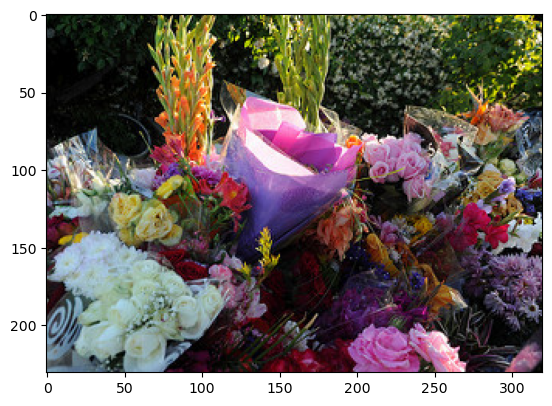

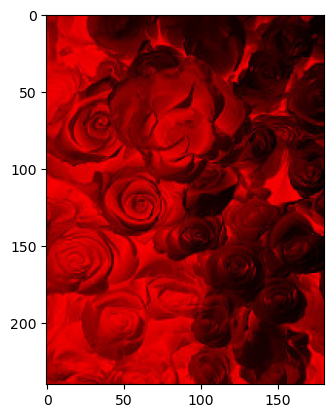

In [14]:
for i in range(0,5):
    plt.imshow(PIL.Image.open(str(roses[i])))
    plt.show()

In [15]:
for i in range(0,5):
    print(f'{i}: {PIL.Image.open(str(roses[i])).size}')

0: (179, 240)
1: (320, 240)
2: (500, 333)
3: (320, 231)
4: (180, 240)


In [16]:
flowers_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
}

In [17]:
flowers_dict['sunflowers']

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1

In [18]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'tulips': 3,
    'sunflowers': 4,
}

In [19]:
flowers_label_dict['roses']

0

In [20]:
flowers_dict.items()

dict_items([('roses', [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flowe

In [21]:
flowers_dict['sunflowers'][0]

WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

In [22]:
cv2.imread(str(flowers_dict['sunflowers'][0]))

array([[[ 42,  49,  34],
        [ 39,  49,  33],
        [ 39,  51,  33],
        ...,
        [ 13,  42,  16],
        [ 12,  41,  15],
        [ 12,  41,  15]],

       [[ 40,  48,  31],
        [ 37,  47,  30],
        [ 37,  49,  31],
        ...,
        [ 17,  43,  25],
        [ 16,  42,  24],
        [ 15,  41,  23]],

       [[ 38,  46,  29],
        [ 35,  45,  28],
        [ 36,  48,  28],
        ...,
        [ 19,  48,  25],
        [ 18,  48,  23],
        [ 17,  47,  22]],

       ...,

       [[ 31, 140,  91],
        [ 91, 142,  98],
        [ 82, 123,  95],
        ...,
        [ 49,  96,  47],
        [ 48,  95,  46],
        [ 48,  94,  47]],

       [[ 19, 141,  87],
        [ 52, 141,  98],
        [ 80, 123,  90],
        ...,
        [ 48,  97,  43],
        [ 50,  96,  44],
        [ 49,  92,  49]],

       [[ 19, 141,  87],
        [ 56, 145, 102],
        [ 90, 133, 100],
        ...,
        [ 48,  96,  44],
        [ 50,  94,  47],
        [ 47,  91,  50]]

In [23]:
img = cv2.imread(str(flowers_dict['sunflowers'][0]))
img.shape

(330, 500, 3)

In [24]:
r = cv2.resize(img, (180,180))
r.shape

(180, 180, 3)

In [25]:
r

array([[[ 38,  48,  32],
        [ 39,  51,  32],
        [ 38,  51,  31],
        ...,
        [ 11,  34,  13],
        [ 15,  40,  18],
        [ 14,  41,  19]],

       [[ 34,  45,  27],
        [ 38,  50,  30],
        [ 36,  49,  27],
        ...,
        [ 16,  46,  21],
        [ 19,  50,  23],
        [ 18,  49,  22]],

       [[ 31,  44,  22],
        [ 35,  48,  26],
        [ 33,  48,  24],
        ...,
        [ 19,  58,  26],
        [ 18,  56,  25],
        [ 18,  55,  25]],

       ...,

       [[ 67, 138,  95],
        [ 23,  96,  61],
        [ 25,  92,  54],
        ...,
        [ 47,  95,  48],
        [ 47, 101,  50],
        [ 46,  93,  45]],

       [[ 85, 143,  99],
        [ 25, 100,  64],
        [ 32,  98,  64],
        ...,
        [ 50, 100,  47],
        [ 47,  94,  44],
        [ 47,  94,  45]],

       [[ 50, 143,  99],
        [ 29, 105,  72],
        [ 36, 103,  66],
        ...,
        [ 46,  94,  43],
        [ 46,  95,  44],
        [ 50,  94,  46]]

In [26]:
flowers_label_dict['roses']

0

In [27]:
x = []
y = []

for flower_name, i in flowers_dict.items():
    for j in i:
        img = cv2.imread(str(j))
        resize_img = cv2.resize(img, (180,180))
        x.append(resize_img)
        y.append(flowers_label_dict[flower_name])

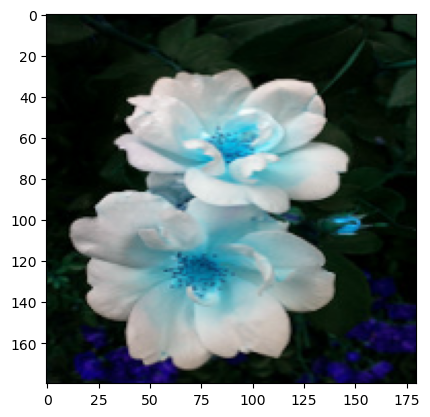

In [29]:
plt.imshow(x[0])

In [30]:
y[0]

0

In [31]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [32]:
x1 = np.array(x)
y1 = np.array(y)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1 ,test_size = 0.2, random_state = 42)

In [35]:
x_train.shape

(2936, 180, 180, 3)

In [36]:
x_test.shape

(734, 180, 180, 3)

In [37]:
y_train.shape

(2936,)

In [38]:
y_test.shape

(734,)

In [39]:
x_train_scaled = x_train / 255
x_test_scaleed = x_test / 255

In [40]:
x_train_scaled[0]

array([[[0.03529412, 0.49411765, 0.34117647],
        [0.04705882, 0.50196078, 0.35686275],
        [0.06666667, 0.52156863, 0.38431373],
        ...,
        [0.03921569, 0.29411765, 0.20392157],
        [0.05490196, 0.29803922, 0.21176471],
        [0.0627451 , 0.29803922, 0.20392157]],

       [[0.01176471, 0.45882353, 0.31764706],
        [0.01960784, 0.4745098 , 0.34117647],
        [0.02745098, 0.49019608, 0.36470588],
        ...,
        [0.03529412, 0.28627451, 0.18431373],
        [0.04313725, 0.28235294, 0.18431373],
        [0.04705882, 0.27843137, 0.18431373]],

       [[0.        , 0.41568627, 0.29019608],
        [0.        , 0.42745098, 0.31372549],
        [0.00392157, 0.45098039, 0.3372549 ],
        ...,
        [0.01960784, 0.26666667, 0.16470588],
        [0.01960784, 0.2627451 , 0.16078431],
        [0.02745098, 0.25490196, 0.15686275]],

       ...,

       [[0.02745098, 0.31764706, 0.11764706],
        [0.        , 0.21568627, 0.05490196],
        [0.01176471, 0

In [41]:
model = Sequential([
    layers.Conv2D(30, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(60, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(90, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(125, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])


model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 20)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.2975 - loss: 1.6021
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.5736 - loss: 1.0910
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.6359 - loss: 0.9122
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7097 - loss: 0.7448
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8378 - loss: 0.4453
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9089 - loss: 0.2753
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9634 - loss: 0.1240
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9800 - loss: 0.0844
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9839 - loss: 0.0688
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9873 - loss: 0.0523
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9809 - loss: 0.0781
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy:

In [42]:
model.evaluate(x_test_scaleed, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 576ms/step - accuracy: 0.6445 - loss: 3.4292


[3.1700961589813232, 0.6566757559776306]

## Overfitting Issue Found

In [44]:
p = model.predict(x_test_scaleed)

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 582ms/step


In [45]:
p[:5]

array([[6.6944333e-05, 1.8224414e-10, 1.7737105e-10, 9.9992800e-01,
        5.0487088e-06],
       [7.3317304e-04, 1.9892698e-06, 7.9962156e-05, 9.9918479e-01,
        3.4102102e-10],
       [3.1552371e-08, 1.1020597e-10, 8.7595035e-13, 3.6721109e-04,
        9.9963272e-01],
       [5.2788885e-15, 5.3132580e-13, 7.8501063e-09, 1.0000000e+00,
        9.3324341e-11],
       [9.9954766e-01, 3.2743015e-09, 1.8948257e-16, 4.5232600e-04,
        5.3033332e-17]], dtype=float32)

In [46]:
predicts = [np.argmax(i) for i in p]

In [47]:
predicts[:5]

[3, 3, 4, 3, 0]

In [48]:
y_test[:5]

array([0, 3, 4, 1, 1])

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       150
           1       0.64      0.61      0.63       126
           2       0.70      0.78      0.74       172
           3       0.57      0.54      0.55       143
           4       0.75      0.77      0.76       143

    accuracy                           0.66       734
   macro avg       0.65      0.65      0.65       734
weighted avg       0.65      0.66      0.65       734



In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [57]:
d = keras.Sequential([
    layers.RandomZoom(0.9),
])

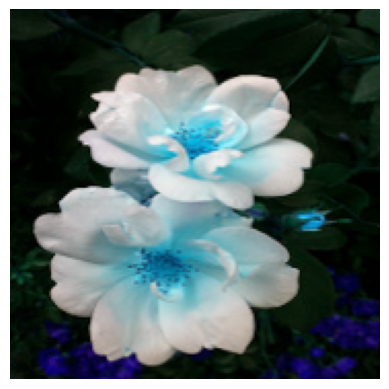

In [52]:
plt.axis('off')
plt.imshow(x1[0])

In [53]:
d(x1)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[19.28236   , 33.798676  , 20.766048  ],
        [17.209194  , 31.725508  , 18.692883  ],
        [15.548939  , 30.222939  , 17.19031   ],
        ...,
        [ 2.7172608 , 11.389102  ,  5.738533  ],
        [ 3.6121953 , 13.761665  ,  7.655838  ],
        [ 5.3058376 , 16.126923  , 10.224804  ]],

       [[22.089668  , 35.82619   , 21.82619   ],
        [19.401466  , 33.49274   , 19.492739  ],
        [17.095154  , 31.673996  , 17.673996  ],
        ...,
        [11.211104  , 21.694082  , 14.390549  ],
        [ 8.20425   , 16.243635  , 10.783092  ],
        [ 3.9405403 , 11.625175  ,  6.723091  ]],

       [[22.483685  , 33.831673  , 20.157679  ],
        [20.26396   , 32.17967   , 18.505672  ],
        [18.106281  , 30.908539  , 17.234545  ],
        ...,
        [19.795092  , 36.607555  , 22.99283   ],
        [16.574886  , 31.277855  , 18.90089   ],
        [10.896934  , 24.167618  , 13.548943  ]],

       ...,

     

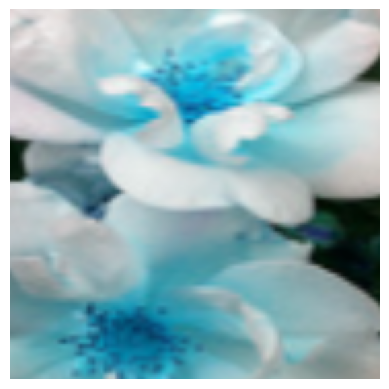

In [58]:
plt.axis('off')
plt.imshow(d(x1)[0].numpy().astype('uint8'))

In [59]:
d1 = keras.Sequential([
    layers.RandomContrast(0.9),
])

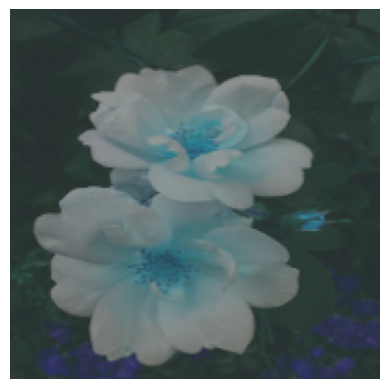

In [61]:
plt.axis('off')
plt.imshow(d1(x1)[0].numpy().astype('uint8'))

In [63]:
height = 180
width = 180
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(height, width,3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5),
  ])

C:\Users\DCL\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model01 = Sequential([

    data_augmentation,
    
    layers.Conv2D(30, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(60, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(90, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(125, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])


model01.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model01.fit(x_train_scaled, y_train, epochs = 20)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.2676 - loss: 1.9208
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 912ms/step - accuracy: 0.4351 - loss: 1.2976
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 914ms/step - accuracy: 0.5411 - loss: 1.1145
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 923ms/step - accuracy: 0.5582 - loss: 1.0893
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 937ms/step - accuracy: 0.5885 - loss: 1.0343
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 916ms/step - accuracy: 0.6085 - loss: 0.9823
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 914ms/step - accuracy: 0.6346 - loss: 0.9300
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 910ms/step - accuracy: 0.6445 - loss: 0.9010
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 911ms/step - accuracy: 0.6423 - loss: 0.8985
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 909ms/step - accuracy: 0.6772 - loss: 0.8687
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 912ms/step - accuracy: 0.6685 - loss: 0.8534
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 

In [66]:
model01.evaluate(x_test_scaleed, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6554 - loss: 0.9035


[0.8535099029541016, 0.6839237213134766]

In [67]:
p1 = model01.predict(x_test_scaleed)

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step


In [68]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       150
           1       0.64      0.61      0.63       126
           2       0.70      0.78      0.74       172
           3       0.57      0.54      0.55       143
           4       0.75      0.77      0.76       143

    accuracy                           0.66       734
   macro avg       0.65      0.65      0.65       734
weighted avg       0.65      0.66      0.65       734



In [69]:
y_pred = [np.argmax(i) for i in p1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.31      0.44       150
           1       0.62      0.81      0.70       126
           2       0.83      0.72      0.77       172
           3       0.58      0.68      0.63       143
           4       0.71      0.92      0.80       143

    accuracy                           0.68       734
   macro avg       0.69      0.69      0.67       734
weighted avg       0.70      0.68      0.67       734



In [70]:
y_pred[0:5]

[3, 3, 4, 4, 1]